## **Dependencies**

In [89]:
# for numerical and mathematical operations
import numpy as np

# for data manipulation and analysis
import pandas as pd

# to interact with the operating system's file system
import os

# for creating visualizations
import matplotlib.pyplot as plt
# to set the dimensions of the figure
plt.figure(figsize=(14,4))

# for ML
from sklearn.model_selection import train_test_split

<Figure size 1400x400 with 0 Axes>

## **Paths**

In [2]:
# get the parent directory path
parent_directory = os.getcwd()

# paths
data_path = os.path.join(parent_directory, 'data')
model_path = os.path.join(parent_directory, 'model') 

## **Reading Datasets**

In [3]:
match = pd.read_csv(os.path.join(data_path, "matches.csv"))
delivery = pd.read_csv(os.path.join(data_path, "deliveries.csv"))

In [4]:
match.sample(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
641,7899,IPL-2018,Jaipur,11-04-2018,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,1,Rajasthan Royals,10,0,SV Samson,Sawai Mansingh Stadium,K Ananthapadmanabhan,Rod Tucker,Nitin Menon
524,525,IPL-2015,Bangalore,13-04-2015,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,8,DA Warner,M Chinnaswamy Stadium,RM Deshpande,RK Illingworth,NaN
206,207,IPL-2010,Mumbai,03-04-2010,Mumbai Indians,Deccan Chargers,Mumbai Indians,bat,normal,0,Mumbai Indians,63,0,AT Rayudu,Brabourne Stadium,BR Doctrove,S Ravi,NaN
258,259,IPL-2011,Delhi,23-04-2011,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Delhi Daredevils,29,0,DA Warner,Feroz Shah Kotla,S Asnani,RE Koertzen,NaN
19,20,IPL-2017,Rajkot,18-04-2017,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Saurashtra Cricket Association Stadium,S Ravi,VK Sharma,NaN


In [5]:
delivery.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
131488,555,1,Kolkata Knight Riders,Sunrisers Hyderabad,11,6,RV Uthappa,MK Pandey,KV Sharma,0,...,0,0,0,0,0,0,0,RV Uthappa,caught,DA Warner
139851,592,1,Royal Challengers Bangalore,Rising Pune Supergiants,2,4,V Kohli,KL Rahul,NLTC Perera,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
69091,292,2,Mumbai Indians,Deccan Chargers,15,5,TL Suman,SR Tendulkar,PP Ojha,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174930,11333,2,Kings XI Punjab,Royal Challengers Bangalore,18,6,DA Miller,N Pooran,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
115448,487,1,Sunrisers Hyderabad,Rajasthan Royals,19,5,IK Pathan,DW Steyn,KW Richardson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


## **Data Preprocessing**

### Checking size of dataset

In [6]:
match.shape

(756, 18)

Conclusion: Dataset has 756 rows and 18 columns

### Checking for duplicate values

In [7]:
match.duplicated().sum()

0

Conclusion: Dataset has no duplicate values

### Checking for null values

In [8]:
match.isnull().sum() 

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Conclusion: city, winner, player_of_match, umpire1, umpire2, umpire3 has null values

### Team1 and Team2 data

#### Checking unique team names

In [9]:
match['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

#### Replacing few team names

In [10]:
match["team1"] = match["team1"].str.replace("Delhi Daredevils", "Delhi Capitals") #these are same teams
match["team2"] = match["team2"].str.replace("Delhi Daredevils", "Delhi Capitals")
match["toss_winner"] = match["toss_winner"].str.replace("Delhi Daredevils", "Delhi Capitals")
match["winner"] = match["winner"].str.replace("Delhi Daredevils", "Delhi Capitals")

match["team1"] = match["team1"].str.replace("Deccan Chargers", "Sunrisers Hyderabad") #these are same teams
match["team2"] = match["team2"].str.replace("Deccan Chargers", "Sunrisers Hyderabad")
match["toss_winner"] = match["toss_winner"].str.replace("Deccan Chargers", "Sunrisers Hyderabad") 
match["winner"] = match["winner"].str.replace("Deccan Chargers", "Sunrisers Hyderabad")

match["team1"] = match["team1"].str.replace("Rising Pune Supergiants", "Rising Pune Supergiant") #mismatch in names
match["team2"] = match["team2"].str.replace("Rising Pune Supergiants", "Rising Pune Supergiant")
match["toss_winner"] = match["toss_winner"].str.replace("Rising Pune Supergiants", "Rising Pune Supergiant") #mismatch in names
match["winner"] = match["winner"].str.replace("Rising Pune Supergiants", "Rising Pune Supergiant")

In [11]:
match['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

## **EDA on first dataset**

### Checking information about dataset

In [12]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### Number of matches played in each season

In [13]:
match['Season'].value_counts().sort_index()

Season
IPL-2008    58
IPL-2009    57
IPL-2010    60
IPL-2011    73
IPL-2012    74
IPL-2013    76
IPL-2014    60
IPL-2015    59
IPL-2016    60
IPL-2017    59
IPL-2018    60
IPL-2019    60
Name: count, dtype: int64

<Axes: xlabel='Season'>

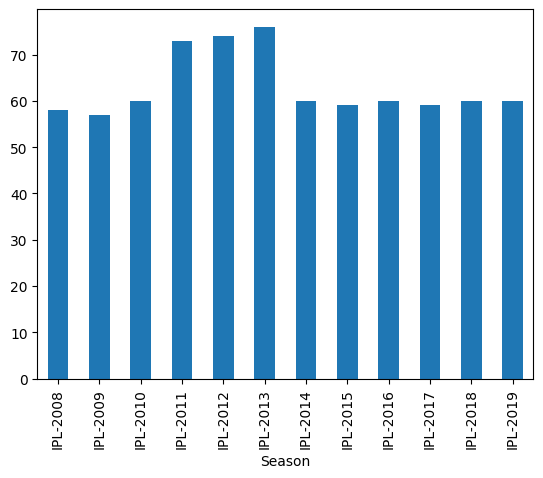

In [14]:
match['Season'].value_counts().sort_index().plot(kind = 'bar')

##### Conclusion: Matches played in mid-seasons are more in number

### Number of matches played in each city

In [15]:
match['city'].value_counts()

city
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

<Axes: ylabel='city'>

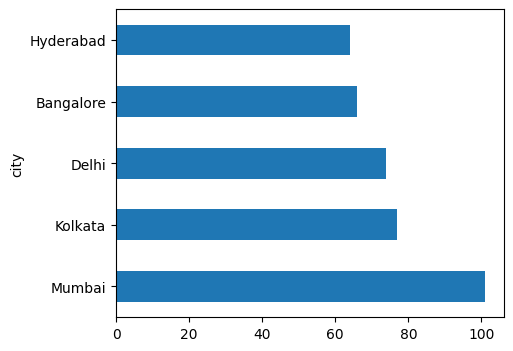

In [16]:
plt.figure(figsize=(5,4))
match['city'].value_counts().head().plot(kind = 'barh')

Conclusion: Most of the matches are played in Mumbai

### Number of matches played by each team

In [17]:
(match['team1'].value_counts() + match['team2'].value_counts()).sort_values(ascending = False)

Mumbai Indians                 187
Sunrisers Hyderabad            183
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Delhi Capitals                 177
Kings XI Punjab                176
Chennai Super Kings            164
Rajasthan Royals               147
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          30
Kochi Tuskers Kerala            14
Name: count, dtype: int64

<Axes: >

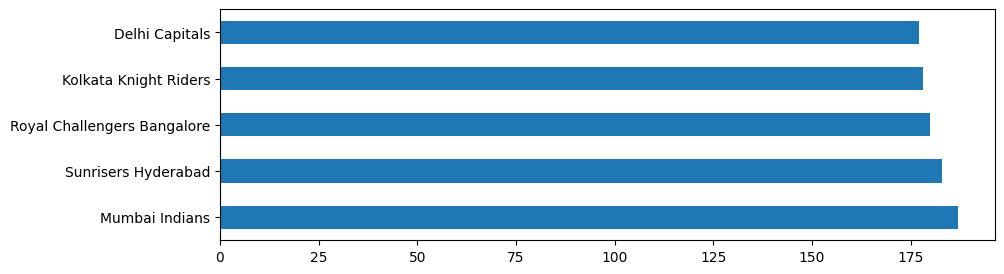

In [18]:
plt.figure(figsize=(10,3))
(match['team1'].value_counts() + match['team2'].value_counts()).sort_values(ascending = False).head().plot(kind = 'barh')

Conclusion: Mumbai Indians has played maximum number of matches

### Number of times each team has won toss

In [19]:
match['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 98
Kolkata Knight Riders          92
Delhi Capitals                 90
Sunrisers Hyderabad            89
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiant         13
Kochi Tuskers Kerala            8
Name: count, dtype: int64

<Axes: ylabel='toss_winner'>

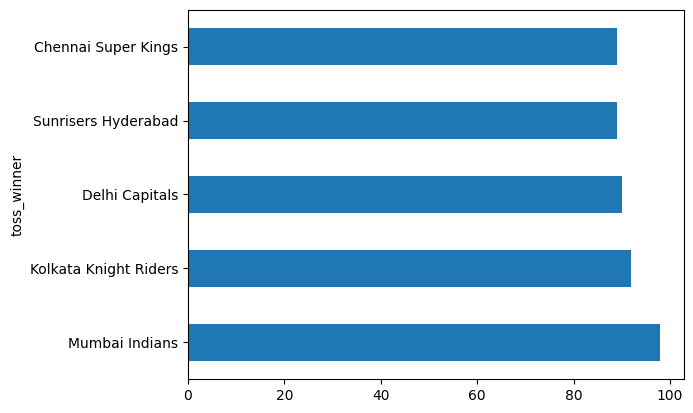

In [20]:
match['toss_winner'].value_counts().head().plot(kind = 'barh')

Conclusion: Mumbai Indians has won toss maximum number of times

### Toss decision after winning the toss

In [21]:
match['toss_decision'].value_counts()

toss_decision
field    463
bat      293
Name: count, dtype: int64

Conclusion: Most of the teams chose fielding first after winning the toss

### Match result

In [22]:
match['result'].value_counts()

result
normal       743
tie            9
no result      4
Name: count, dtype: int64

Conclusion: Most of the matches have normal result, while 9 matches were tied and 4 matches have no result

In [23]:
match[match['result'] == 'no result']

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,IPL-2011,Delhi,21-05-2011,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


Conclusion: Most of the matches that resulted in no result was played in Bangalore. It maybe because of rain during complete match.

### Matches affected by rain

In [24]:
match['dl_applied'].value_counts()

dl_applied
0    737
1     19
Name: count, dtype: int64

Conclusion: Only few matches are affected by rain.

### Winner

In [25]:
match['winner'].value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: count, dtype: int64

<Axes: ylabel='winner'>

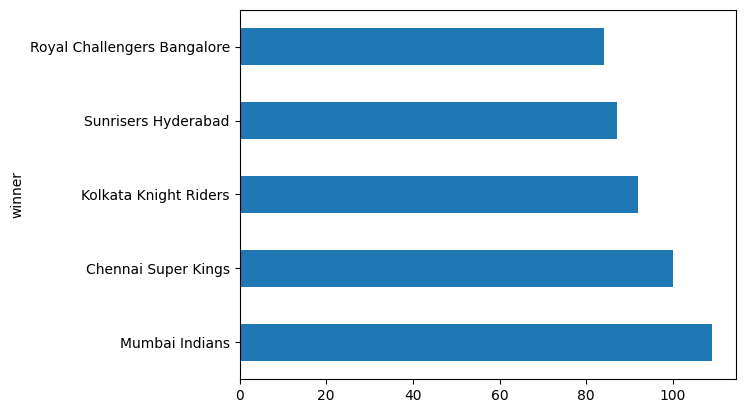

In [26]:
match['winner'].value_counts().head().plot(kind = 'barh')

Conclusion: Mumbai Indians has won most number of matches

### Correlation between winning the toss and winning the match

In [27]:
match['toss_winner'].value_counts().corr(match['winner'].value_counts())

0.9851868277346238

Conclusion: Winning the toss is important to win the match.

### Correlation between fielding first and winning match

In [28]:
field = match[['toss_winner', 'toss_decision', 'winner']][match['toss_decision'] == 'field']
(field['toss_winner'] == field['winner']).value_counts()

True     259
False    204
Name: count, dtype: int64

Conclusion: After winning the toss, out of 463 times, teams chosen fielding first has won 259 times

### Win by runs

In [29]:
match[match['win_by_runs'] != 0]['win_by_runs'].mean()

29.798219584569733

Conclusion: average winning margin for team batting first is approx. 30

In [30]:
match[match['win_by_runs'] != 0][['winner', 'win_by_runs']].groupby('winner').mean().sort_values(by = 'win_by_runs', ascending = False)

,win_by_runs
winner,
Royal Challengers Bangalore,35.771429
Chennai Super Kings,34.192308
Rajasthan Royals,33.148148
Mumbai Indians,32.736842
Kolkata Knight Riders,30.166667
Delhi Capitals,27.392857
Rising Pune Supergiant,25.142857
Kings XI Punjab,24.342105
Sunrisers Hyderabad,23.625000


Conclusion: Among the teams who have batted first, Royal Challengers Bangalore has the maximum average winning margin

### Win by wickets

<Axes: xlabel='win_by_wickets'>

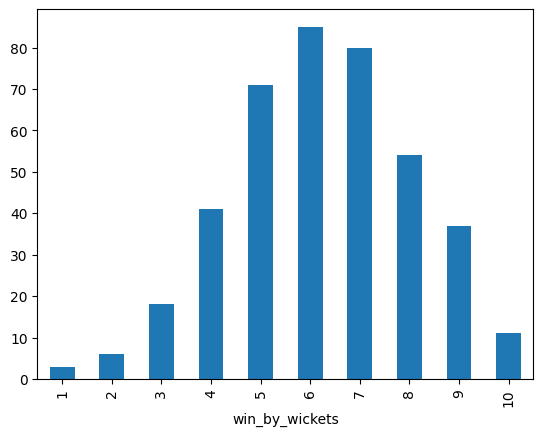

In [31]:
match[match['win_by_wickets'] != 0]['win_by_wickets'].value_counts().sort_index().plot(kind = 'bar')

Conclusion: Most of the time teams won by 6 wickets

### Player of match

In [32]:
match['player_of_match'].value_counts().head()

player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: count, dtype: int64

##### Conclusion: Chris Gayle won most player of the match

### Venue

In [33]:
match['venue'].value_counts().head()

venue
Eden Gardens                                 77
M Chinnaswamy Stadium                        73
Wankhede Stadium                             73
Feroz Shah Kotla                             67
Rajiv Gandhi International Stadium, Uppal    56
Name: count, dtype: int64

Conclusion: Most of the matches were played in Eden Gardens

## **Preprocessing on second dataset**

In [34]:
delivery.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### 5.1. Checking size of dataset

In [35]:
delivery.shape

(179078, 21)

##### Conclusion: Dataset has 1,79,078 rows and 21 columns

### 5.2 Checking for duplicate values

In [36]:
delivery.duplicated().sum()

23

##### Conclusion: There are 23 duplicate rows

### 5.3 Dropping duplicates

In [37]:
delivery.drop_duplicates(inplace = True)
delivery.shape

(179055, 21)

### 5.4 Checking for null values

In [38]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

##### Conclusion: No null values (player_dismissed, dismissal_kind, fielder is null because only for few rows they are true)

### 5.5 Replacing few team names

In [39]:
delivery['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [40]:
delivery["batting_team"] = delivery["batting_team"].str.replace("Delhi Daredevils", "Delhi Capitals") #these are same teams
delivery["bowling_team"] = delivery["bowling_team"].str.replace("Delhi Daredevils", "Delhi Capitals")

delivery["batting_team"] = delivery["batting_team"].str.replace("Deccan Chargers", "Sunrisers Hyderabad") #these are same teams
delivery["bowling_team"] = delivery["bowling_team"].str.replace("Deccan Chargers", "Sunrisers Hyderabad")

delivery["batting_team"] = delivery["batting_team"].str.replace("Rising Pune Supergiants", "Rising Pune Supergiant") #mismatch in names
delivery["bowling_team"] = delivery["bowling_team"].str.replace("Rising Pune Supergiants", "Rising Pune Supergiant")

In [41]:
delivery['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors'], dtype=object)

### 5.6 Batsman column

In [42]:
delivery['batsman'].value_counts().head()

batsman
V Kohli      4211
SK Raina     4044
RG Sharma    3816
S Dhawan     3775
G Gambhir    3524
Name: count, dtype: int64

##### Conclusion: V Kohli has played the most number of balls

### 5.7 Bowler column

In [43]:
delivery['bowler'].value_counts().head()

bowler
Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
Name: count, dtype: int64

##### Conclusion: Harbhajan Singh has bowled the most number of balls

### 5.8 Inning column

In [44]:
delivery['inning'].value_counts()

inning
1    92727
2    86232
3       50
4       38
5        8
Name: count, dtype: int64

##### Conclusion: There are few matches with 3,4 and 5 innings that may be super over matches, so it's better to remove those innings.

### 5.9 Filtering out matches that played in either inning 1 or 2

In [45]:
delivery = delivery[(delivery['inning'] == 1) | (delivery['inning'] == 2)]
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


##### Conclusion: This dataframe contains only matches that are played in innings 1 or 2

### 5.10 Finding runs scored in each innings

1. Group data by matchid and innings
2. Find sum of total runs scored in each innings
3. Convert it into dataframe

In [46]:
total_score_df = delivery.groupby(["match_id", "inning"]).sum()["total_runs"].reset_index()
total_score_df.rename(columns = {'total_runs':'runs_batting_first'}, inplace = True)
total_score_df

,match_id,inning,runs_batting_first
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1505,11413,2,170
1506,11414,1,155
1507,11414,2,162
1508,11415,1,152


##### Conclusion: This dataframe is formed from delivery and contains total runs scored in each innings

### 5.11 Filtering only first innings score

In [47]:
total_score_df = total_score_df[total_score_df["inning"] == 1]
total_score_df

,match_id,inning,runs_batting_first
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1500,11347,1,143
1502,11412,1,136
1504,11413,1,171
1506,11414,1,155


##### Conclusion: This df contains only scores made in 1st innings

In [48]:
match.shape

(756, 18)

In [49]:
total_score_df.shape

(756, 3)

### 5.12 Merge total_score_df with match to create a df that contains 1st innings score

In [50]:
match_df = match.merge(total_score_df[["match_id", "runs_batting_first"]], left_on = "id", right_on = "match_id")
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,runs_batting_first
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


##### Conclusion: This df contain all matches along with runs scored by teams batting first

### 5.12 Removing teams that don't participate now

In [51]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors'], dtype=object)

In [52]:
teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals']

In [53]:
match_df = match_df[match_df["team1"].isin(teams)]
match_df = match_df[match_df["team2"].isin(teams)]

In [54]:
match_df.shape

(641, 20)

##### Conclusion: Now our df will contain only 8 teams.

### 5.13 Filter matches that are not affected by rain

In [55]:
match_df = match_df[match_df["dl_applied"] == 0]
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,runs_batting_first
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


##### Conclusion: Now df contains only matches not affected by rain

### 5.14 Form a dataframe containing batting_team, bowling_team, city, runs_left, balls_left, wickets_left, target, crr, rrr, result

#### 5.14.1 Merge match_df with delivery

In [56]:
match_df = match_df[["match_id","city", "winner","runs_batting_first"]]
match_df

,match_id,city,winner,runs_batting_first
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155


In [57]:
delivery_df = match_df.merge(delivery, on="match_id")
delivery_df

,match_id,city,winner,runs_batting_first,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149467,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149468,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149469,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149470,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


##### Conclusion: This df contains ball by ball match record along with runs scored by team batting first

#### 5.14.2 Filter second innings data to get target

In [58]:
delivery_df = delivery_df[delivery_df["inning"]==2]
delivery_df

,match_id,city,winner,runs_batting_first,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149467,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149468,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149469,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149470,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


#### 5.14.3 Finding runs scored after each ball

In [66]:
delivery_df["current_score"] = delivery_df.groupby("match_id")["total_runs"].cumsum()
delivery_df

/var/folders/7g/hlcqsc0s06lbdjndjnmhtmdr0000gn/T/ipykernel_55028/3967078015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df["current_score"] = delivery_df.groupby("match_id")["total_runs"].cumsum()


,match_id,city,winner,runs_batting_first,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,target,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,208,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,208,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,208,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,208,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,208,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149467,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,153,152
149468,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,153,154
149469,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,153,155
149470,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,153,157


#### 5.14.4 Finding target

In [67]:
delivery_df["target"] = delivery_df["runs_batting_first"] + 1

/var/folders/7g/hlcqsc0s06lbdjndjnmhtmdr0000gn/T/ipykernel_55028/2191066693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df["target"] = delivery_df["runs_batting_first"] + 1


#### 5.14.5 Finding runs left after each ball

In [68]:
delivery_df["runs_left"] = delivery_df["target"] - delivery_df["current_score"]

/var/folders/7g/hlcqsc0s06lbdjndjnmhtmdr0000gn/T/ipykernel_55028/1422049309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df["runs_left"] = delivery_df["target"] - delivery_df["current_score"]


#### 5.14.6 Finding balls left after each ball

In [69]:
delivery_df["balls_left"] = 126 - (delivery_df["over"]*6 + delivery_df["ball"])
delivery_df

/var/folders/7g/hlcqsc0s06lbdjndjnmhtmdr0000gn/T/ipykernel_55028/906551233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df["balls_left"] = 126 - (delivery_df["over"]*6 + delivery_df["ball"])


,match_id,city,winner,runs_batting_first,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,target,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,NaN,NaN,NaN,208,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,NaN,208,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,NaN,208,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,NaN,NaN,NaN,208,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,NaN,NaN,NaN,208,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149467,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,NaN,NaN,NaN,153,152,1,4
149468,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,NaN,NaN,NaN,153,154,-1,3
149469,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,SR Watson,run out,KH Pandya,153,155,-2,2
149470,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,NaN,NaN,NaN,153,157,-4,1


#### 5.14.7 Finding wickets left after each ball

1. Fill player_dismissed with "0" in place of NaN

In [70]:
delivery_df["player_dismissed"] = delivery_df["player_dismissed"].fillna("0")
delivery_df

/var/folders/7g/hlcqsc0s06lbdjndjnmhtmdr0000gn/T/ipykernel_55028/3367208707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df["player_dismissed"] = delivery_df["player_dismissed"].fillna("0")


,match_id,city,winner,runs_batting_first,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,target,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,208,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,208,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,208,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,208,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,208,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149467,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,153,152,1,4
149468,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,153,154,-1,3
149469,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,SR Watson,run out,KH Pandya,153,155,-2,2
149470,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,153,157,-4,1


2. Replace names in player dismissed by 1.

In [71]:
delivery_df["player_dismissed"] = delivery_df["player_dismissed"].apply(lambda x: x if x == "0" else "1")
delivery_df

/var/folders/7g/hlcqsc0s06lbdjndjnmhtmdr0000gn/T/ipykernel_55028/3560960604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df["player_dismissed"] = delivery_df["player_dismissed"].apply(lambda x: x if x == "0" else "1")


,match_id,city,winner,runs_batting_first,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,target,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,208,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,208,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,208,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,208,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,208,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149467,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,153,152,1,4
149468,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,153,154,-1,3
149469,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,153,155,-2,2
149470,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,153,157,-4,1


3. Make player_dismissed column integer

In [72]:
delivery_df["player_dismissed"] = delivery_df["player_dismissed"].astype(int)
delivery_df

/var/folders/7g/hlcqsc0s06lbdjndjnmhtmdr0000gn/T/ipykernel_55028/2113825603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df["player_dismissed"] = delivery_df["player_dismissed"].astype(int)


,match_id,city,winner,runs_batting_first,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,target,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,208,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,208,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,208,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,208,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,208,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149467,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,153,152,1,4
149468,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,153,154,-1,3
149469,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,153,155,-2,2
149470,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,153,157,-4,1


4. Find cumulative sum of player_dismissed for each inning

In [74]:
wickets = delivery_df.groupby("match_id")["player_dismissed"].cumsum()

5. Find wickets remaining

In [75]:
delivery_df["wickets_remain"] = 10 - wickets

/var/folders/7g/hlcqsc0s06lbdjndjnmhtmdr0000gn/T/ipykernel_55028/3228644143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df["wickets_remain"] = 10 - wickets


In [76]:
delivery_df

,match_id,city,winner,runs_batting_first,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,target,current_score,runs_left,balls_left,wickets_remain
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,208,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,208,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,208,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,208,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,208,7,201,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149467,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,NaN,NaN,153,152,1,4,5
149468,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,NaN,NaN,153,154,-1,3,5
149469,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,1,run out,KH Pandya,153,155,-2,2,4
149470,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,NaN,NaN,153,157,-4,1,4


## 5.14.8 Find current run rate, required run rate, winner

1. Finding crr

In [77]:
delivery_df["crr"] = (delivery_df["current_score"]*6)/(120 - delivery_df["balls_left"])

/var/folders/7g/hlcqsc0s06lbdjndjnmhtmdr0000gn/T/ipykernel_55028/75216259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df["crr"] = (delivery_df["current_score"]*6)/(120 - delivery_df["balls_left"])


2. Finding rrr

In [78]:
delivery_df["rrr"] = (delivery_df["runs_left"]*6)/delivery_df["balls_left"]

/var/folders/7g/hlcqsc0s06lbdjndjnmhtmdr0000gn/T/ipykernel_55028/3920658286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df["rrr"] = (delivery_df["runs_left"]*6)/delivery_df["balls_left"]


3. Finding if chasing team won or not

In [79]:
def result(row):
    return 1 if row["batting_team"] == row["winner"] else 0

In [80]:
delivery_df["result"] = delivery_df.apply(result, axis = 1)

/var/folders/7g/hlcqsc0s06lbdjndjnmhtmdr0000gn/T/ipykernel_55028/3398920105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df["result"] = delivery_df.apply(result, axis = 1)


#### 5.14.9 Filtering required data

In [81]:
final_df = delivery_df[["batting_team","bowling_team","city","runs_left","balls_left","wickets_remain","target","crr","rrr","result"]]

In [82]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remain,target,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.000000,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.000000,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.000000,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.500000,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...
149467,Chennai Super Kings,Mumbai Indians,Hyderabad,1,4,5,153,7.862069,1.500000,0
149468,Chennai Super Kings,Mumbai Indians,Hyderabad,-1,3,5,153,7.897436,-2.000000,0
149469,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,2,4,153,7.881356,-6.000000,0
149470,Chennai Super Kings,Mumbai Indians,Hyderabad,-4,1,4,153,7.915966,-24.000000,0


# 6. Final preprocessing on data

### 6.1 Removing discrepancy in data

1. Remove all rows which have runs left <= 0
2. Remove all rows which have balls left <= 0

In [83]:
final_df = final_df[final_df['runs_left'] > 0]
final_df = final_df[final_df['balls_left'] > 0]
final_df.describe()

,runs_left,balls_left,wickets_remain,target,crr,rrr,result
count,71733.000000,71733.000000,71733.000000,71733.000000,71733.000000,71733.000000,71733.000000
mean,94.040804,63.182663,7.562754,166.571745,7.430092,10.726550,0.525030
std,49.536474,33.094957,2.118192,29.267363,2.279723,12.996972,0.499377
min,1.000000,1.000000,0.000000,66.000000,0.000000,0.080000,0.000000
25%,55.000000,35.000000,6.000000,147.000000,6.242424,7.285714,0.000000
50%,93.000000,64.000000,8.000000,166.000000,7.469388,9.000000,1.000000
75%,131.000000,92.000000,9.000000,186.000000,8.673913,11.040000,1.000000
max,250.000000,119.000000,10.000000,251.000000,42.000000,684.000000,1.000000


### 6.2 Checking for null values

In [84]:
final_df.isnull().sum()

batting_team        0
bowling_team        0
city              826
runs_left           0
balls_left          0
wickets_remain      0
target              0
crr                 0
rrr                 0
result              0
dtype: int64

### 6.3 Removing rows with null values

In [85]:
final_df.dropna(inplace = True)

### 6.4 Shuffling

Since all results of a single match are together, a bias can be developed. Therefore, shuffling should be done.

In [86]:
final_df = final_df.sample(final_df.shape[0])

In [87]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remain,target,crr,rrr,result
126006,Rajasthan Royals,Mumbai Indians,Jaipur,24,11,4,173,8.201835,13.090909,1


# 7. Model Building

### 7.1 Train test split

In [90]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [91]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remain,target,crr,rrr
58260,Royal Challengers Bangalore,Chennai Super Kings,Chennai,188,102,8,206,6.000000,11.058824
127882,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,133,84,10,186,8.833333,9.500000
56358,Royal Challengers Bangalore,Kings XI Punjab,Dharamsala,228,106,9,233,2.142857,12.905660
10998,Royal Challengers Bangalore,Delhi Capitals,Delhi,120,65,7,192,7.854545,11.076923
24244,Delhi Capitals,Sunrisers Hyderabad,Centurion,90,69,7,149,6.941176,7.826087
...,...,...,...,...,...,...,...,...,...
84133,Delhi Capitals,Chennai Super Kings,Chennai,163,113,9,169,5.142857,8.654867
37801,Kings XI Punjab,Rajasthan Royals,Chandigarh,175,111,10,184,6.000000,9.459459
117446,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,171,105,10,195,9.600000,9.771429
47037,Royal Challengers Bangalore,Mumbai Indians,Mumbai,115,69,8,185,8.235294,10.000000


In [92]:
y_train

58260     0
127882    1
56358     0
10998     0
24244     1
         ..
84133     0
37801     0
117446    0
47037     0
106197    0
Name: result, Length: 56725, dtype: int64

In [93]:
X_test

,batting_team,bowling_team,city,runs_left,balls_left,wickets_remain,target,crr,rrr
103280,Delhi Capitals,Kings XI Punjab,Pune,134,94,9,166,7.384615,8.553191
11020,Royal Challengers Bangalore,Delhi Capitals,Delhi,75,43,7,192,9.116883,10.465116
21041,Royal Challengers Bangalore,Chennai Super Kings,Port Elizabeth,151,100,9,180,8.700000,9.060000
54504,Kings XI Punjab,Royal Challengers Bangalore,Bangalore,127,33,3,206,5.448276,23.090909
62738,Delhi Capitals,Sunrisers Hyderabad,Hyderabad,98,67,9,188,10.188679,8.776119
...,...,...,...,...,...,...,...,...,...
76057,Mumbai Indians,Rajasthan Royals,Jaipur,170,102,8,180,3.333333,10.000000
2861,Delhi Capitals,Sunrisers Hyderabad,Hyderabad,100,52,7,192,8.117647,11.538462
49919,Kolkata Knight Riders,Rajasthan Royals,Jaipur,46,40,9,160,8.550000,6.900000
63013,Royal Challengers Bangalore,Kings XI Punjab,Chandigarh,31,22,7,164,8.142857,8.454545


In [94]:
y_test

103280    1
11020     0
21041     0
54504     0
62738     1
         ..
76057     0
2861      0
49919     1
63013     1
106030    1
Name: result, Length: 14182, dtype: int64

### 7.2 Applying One Hot Encoding on batting_team, bowling_team, city

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

### 7.3 Pipeline Creation and Model Training

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [97]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression(solver='liblinear'))
])

In [98]:
pipe.fit(X_train,y_train)

/Users/amanbhatt/Desktop/ipl-win-probability/ipl_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

### 7.4 Predicting and checking accuracy

In [99]:
y_pred = pipe.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8030602171767028

### 7.5 Dumping pipe object

In [103]:
import pickle
pickle.dump(pipe,open(os.path.join(model_path, 'pipe.pkl'),'wb'))